In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

# 1. Load Mouse_metadata.csv and Study_results.csv from the Resources folder into the notebook.
#    Then, using Pandas, display the top five rows of each DataFrame.

mouse=pd.read_csv('Mouse_metadata.csv')
mouse.head(5)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study=pd.read_csv('Study_results.csv')
study.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# 2 Merge the two DataFrames and display the top five rows of the merged DataFrame.

merge_df = pd.merge(mouse, study, on="Mouse ID", how="left")

merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# 3 At least one mouse has multiple entries for the same time point; this data must have been 
#entered incorrectly, so data from these mice cannot be used. Find the rows with duplicate 
#"Mouse ID" and "Timepoint." Optionally, you can create a DataFrame to view the duplicates.



merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
merge_df.loc[merge_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
#4 Create a clean DataFrame by dropping any rows containing a compromised "Mouse ID".

clean_dataframe=merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#                                          Part 2
# 1. Create a max_timepoint DataFrame that has the greatest time point for each mouse.
max_timepoint=merge_df.groupby(['Mouse ID']).max()
max_timepoint.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1


In [8]:
# Reset the index of the Pandas DataFrame. 
max_timepoint.reset_index()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [29]:
#2 Join the newly created max_timepoint DataFrame with the cleaned DataFrame from Part 1 to 
#create a new DataFrame merged_data. This DataFrame should contain all the columns from Part 1,
#but only the row with the maximum time point for each mouse.

merge_dataframe = pd.merge(max_timepoint, clean_dataframe,how='outer') 
merge_dataframe

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,Infubinol,Female,20,23,45,67.973419,2,a203
1,Infubinol,Female,21,25,45,65.525743,1,a251
2,Placebo,Female,17,29,45,70.717621,4,a262
3,Ceftamin,Female,20,28,45,62.999356,3,a275
4,Stelasyn,Female,16,29,30,63.440686,1,a366
...,...,...,...,...,...,...,...,...
1932,Naftisol,Male,9,30,20,57.898778,2,z969
1933,Naftisol,Male,9,30,25,63.145652,2,z969
1934,Naftisol,Male,9,30,30,65.841013,3,z969
1935,Naftisol,Male,9,30,35,69.176246,4,z969


In [32]:
# 3 Create a separate list of final tumor volumes for each drug regimen. 
#Then store those lists in another list..


drug_regimen=merge_dataframe["Drug Regimen"].unique()  # Drug List
tumor_volume=[] 
drug_one_array=[]
drug_two_array=[]
drug_three_array=[]
drug_four_array=[]
drug_five_array=[]
drug_six_array=[]
drug_seven_array=[]
drug_eight_array=[]
drug_nine_array=[]
drug_ten_array=[]

for i in range(len(merge_dataframe)) :
    volume=merge_dataframe.loc[i,"Tumor Volume (mm3)"]
    output=volume,merge_dataframe.loc[i, "Drug Regimen"]
    tumor_volume.append(volume)
    if output[1]==drug_regimen[0]:
        drug_one_array.append(volume)
    if output[1]==drug_regimen[1]:
        drug_two_array.append(volume)
    if output[1]==drug_regimen[2]:
        drug_three_array.append(volume)
    if output[1]==drug_regimen[3]:
        drug_four_array.append(volume)
    if output[1]==drug_regimen[4]:
        drug_five_array.append(volume)
    if output[1]==drug_regimen[5]:
        drug_six_array.append(volume)
    if output[1]==drug_regimen[6]:
        drug_seven_array.append(volume)
    if output[1]==drug_regimen[7]:
        drug_eight_array.append(volume)
    if output[1]==drug_regimen[8]:
        drug_nine_array.append(volume)
    if output[1]==drug_regimen[9]:
        drug_ten_array.append(volume)
 

In [24]:
# Tumor volume array
tumor_volume

[67.97341878,
 65.52574285,
 70.71762058,
 62.99935619,
 63.44068627,
 66.79415599,
 45.46667714,
 45.0,
 49.78341894,
 60.12201052,
 45.0,
 57.03186187,
 46.91089166,
 66.08306589,
 62.19141437,
 60.41370908,
 74.99776443,
 72.25596306,
 62.76509317,
 45.65133131,
 55.74514628,
 45.0,
 56.05774909,
 73.05136339,
 45.0,
 55.74282869,
 72.55523894,
 72.2267309,
 67.94212107,
 65.81516535,
 64.57522157,
 45.0,
 74.04039018,
 45.72227949,
 61.84005842,
 58.04656941,
 69.04284082,
 46.94094512,
 69.82314577,
 62.17570465,
 65.41595451,
 60.96971133,
 64.18322918,
 45.0,
 45.0,
 47.47464468,
 45.0,
 60.23373278,
 63.1056963,
 73.21293851,
 55.1389525,
 62.43540402,
 68.3597767,
 46.40908385,
 49.98830246,
 57.74875831,
 48.19457788,
 60.91876652,
 47.03309963,
 48.72207785,
 73.32443228,
 45.0,
 45.0,
 52.07951009,
 71.90511721,
 46.30400254,
 68.16319517,
 46.80922469,
 69.87225079,
 61.77496268,
 70.49278763,
 45.85153062,
 51.06041924,
 62.57087961,
 74.10408567,
 55.45528975,
 45.0,
 47

<function matplotlib.pyplot.show(close=None, block=None)>

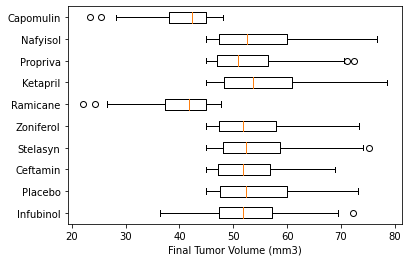

In [33]:
plot_array=[drug_one_array,
drug_two_array,
drug_three_array,
drug_four_array,
drug_five_array,
drug_six_array,
drug_seven_array,
drug_eight_array,
drug_nine_array,
drug_ten_array]
plt.boxplot(plot_array,labels=['Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ramicane','Ketapril','Propriva','Nafyisol','Capomulin'],vert=False)
plt.xlabel("Final Tumor Volume (mm3)")
plt.show 